In [1]:
import ROOT

Welcome to JupyROOT 6.12/06


In [2]:
w = ROOT.RooWorkspace("w");


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
x = w.factory("x[110,160]");

## Data

In [4]:
tree = ROOT.TTree("tree","tree")
nevt = tree.ReadFile("Hgg.txt","x")

In [5]:
argset = ROOT.RooArgSet(x)

In [6]:
data = ROOT.RooDataSet("data","data",argset,ROOT.RooFit.Import(tree) )

[#1] INFO:Eval -- RooAbsReal::attachToTree(x) TTree Float_t branch x will be converted to double precision


## Build workspace

In [7]:
w.factory("nbackground[10000, 0, 1000000]")

<ROOT.RooRealVar object ("nbackground") at 0x6b4f8a0>

In [8]:
w.factory("nsignal[100, 0.0, 1000.0]")

<ROOT.RooRealVar object ("nsignal") at 0x707d860>

In [9]:
w.var("nbackground").setMin(0.1*nevt)
w.var("nbackground").setMax(10*nevt)

### Background

In [10]:
w.factory("a1[ 7.5, -500, 500]")
w.factory("a2[-1.5, -500, 500]")
w.factory("expr::z('-(a1*x/100 + a2*(x/100)^2)', a1, a2, x)")
w.factory("Exponential::bmodel(z, 1)")

<ROOT.RooExponential object ("bmodel") at 0x71ae5f0>

### Signal model

In [11]:
w.factory("mass[130, 110, 150]")
w.factory("width[1, 0.5, 5]")
w.factory("Gaussian::smodel(x, mass, width)")
smodel = w.pdf("smodel");

### Complete model

In [12]:
w.factory("SUM::model(nbackground*bmodel, nsignal*smodel)")

<ROOT.RooAddPdf object ("model") at 0x71fec70>

In [13]:
model = w.pdf("model")

In [14]:
r = model.fitTo(data, ROOT.RooFit.Minimizer("Minuit2"), ROOT.RooFit.Save(True), ROOT.RooFit.Offset(True))

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_model_FOR_OBS_x with 0 entries
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bmodel,smodel)
Minuit2Minimizer: Minimize with max-calls 3000 convergence for edm < 1 strategy 1
[#1] INFO:Minization -- RooNLLVar::evaluatePartition(nll_model_data) first = 0 last = 30770 Likelihood offset now set to -156454
MnSeedGenerator: for initial parameters FCN = 0
MnSeedGenerator: Initial state:   - FCN =                0 Edm =    

Info in <Minuit2>: Minuit2Minimizer::Hesse : Hesse is valid - matrix is accurate


Plot

[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bmodel)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: (z)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (smodel)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:NumericIntegration -- RooRealIntegral::init(bmodel_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


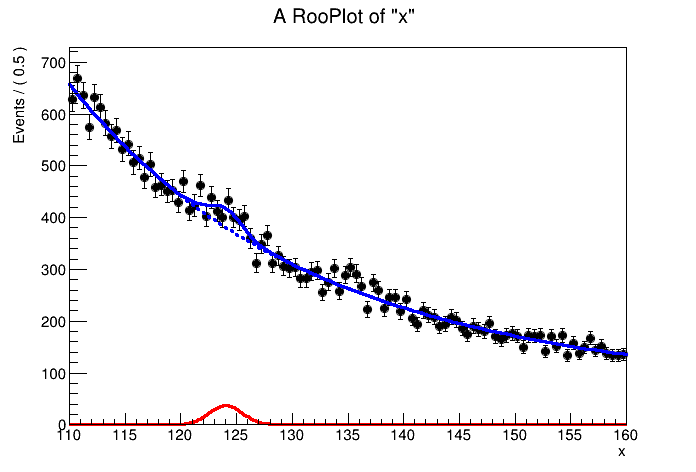

In [15]:
canv = ROOT.TCanvas()
plot = w.var("x").frame()
data.plotOn(plot)
model.plotOn(plot)
model.plotOn(plot, ROOT.RooFit.Components("bmodel"),ROOT.RooFit.LineStyle(ROOT.kDashed))
model.plotOn(plot, ROOT.RooFit.Components("smodel"),ROOT.RooFit.LineColor(ROOT.kRed))
plot.Draw()
canv.Draw()

In [16]:
mc = ROOT.RooStats.ModelConfig("ModelConfig",w);

In [17]:
mc.SetPdf(w.pdf("model"))
POI_argset = ROOT.RooArgSet(w.var("nsignal"))
mc.SetParametersOfInterest(POI_argset)
obs_argset = ROOT.RooArgSet(w.var("x"))
mc.SetObservables(obs_argset)

In [18]:
w.defineSet("nuisParams","a1,a2,nbackground")

False

In [19]:
mc.SetNuisanceParameters(w.set("nuisParams"));

In [20]:
w.var("mass").setConstant(True)
w.var("width").setConstant(True)

In [21]:
getattr(w,'import')(mc)

False

In [23]:
#h1 = data.createHistogram()
#bindata = RooDataHist("obsData","obsData", obs_argset, h1)
getattr(w,'import')(data)

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset data


In [24]:
w.writeToFile("HggModel.root")

False

In [25]:
w.Print()


RooWorkspace(w) w contents

variables
---------
(a1,a2,mass,nbackground,nsignal,width,x)

p.d.f.s
-------
RooExponential::bmodel[ x=z c=1 ] = 0.00035174
RooAddPdf::model[ nbackground * bmodel + nsignal * smodel ] = 0.000348632
RooGaussian::smodel[ x=x mean=mass sigma=width ] = 1.06331e-12

functions
--------
RooFormulaVar::z[ actualVars=(a1,a2,x) formula="-(a1*x/100+a2*(x/100)^2)" ] = -7.95262

datasets
--------
RooDataSet::data(x)

named sets
----------
ModelConfig_NuisParams:(a1,a2,nbackground)
ModelConfig_Observables:(x)
ModelConfig_POI:(nsignal)
nuisParams:(a1,a2,nbackground)

generic objects
---------------
RooStats::ModelConfig::ModelConfig

